In [50]:
from pycaret.regression import *
import pandas as pd
import matplotlib.pyplot as plt

In [51]:
df_raw = pd.read_csv('kastom_filled.csv', parse_dates=[0], index_col=0)
df = df_raw.copy()
df.tail()

,Temp (C),Humidity (%),PM10,PM2.5,CO,NO2 (ug/m3)
Datetime,,,,,,
2022-07-18 10:00:00,30.81,30.33,33.0,21.0,247.71,48.08
2022-07-18 11:00:00,31.25,32.89,40.0,25.0,312.15,70.74
2022-07-18 12:00:00,31.00,36.43,42.0,26.0,406.42,84.62
2022-07-18 13:00:00,31.50,37.77,49.0,31.0,398.44,80.81
2022-07-18 14:00:00,31.00,39.02,47.0,30.0,377.55,86.03


In [52]:
steps = 7*24
train = df[:-steps]
test = df[-steps:]

target = 'PM2.5'
numeric_features = df.columns.drop(target).to_list()

In [53]:
s = setup(data=train, test_data=test, target=target, fold_strategy='timeseries',
          numeric_features=numeric_features,
          fold=3,  silent=True, transform_target=True, session_id=123, verbose=0)

In [54]:
model = create_model('rf')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.6289,0.6899,0.8306,0.9971,0.0326,0.0248
1,0.5058,0.4486,0.6698,0.9983,0.0270,0.0201
2,0.4217,0.3033,0.5507,0.9982,0.0240,0.0179
Mean,0.5188,0.4806,0.6837,0.9979,0.0279,0.0209
Std,0.0851,0.1594,0.1147,0.0006,0.0036,0.0029


In [55]:
predictions = predict_model(model, data=test)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,0.5856,0.5564,0.7459,0.9962,0.0364,0.0303


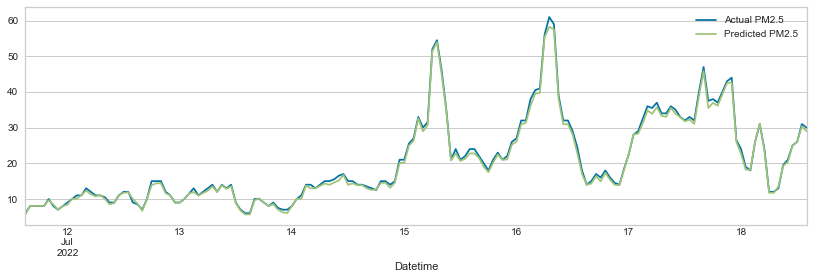

In [56]:
plt.style.use('seaborn-notebook')
predictions[[target, 'Label']].plot(figsize=(14,4))
plt.legend([f'Actual {target}', f'Predicted {target}'])
plt.show()